Uploud the data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm

from random import*
from google.colab import drive
from scipy.stats import multivariate_normal
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 4: Read the CSV file into a DataFrame
Xy_train = pd.read_csv("/content/drive/Shareddrives/ML/חלק ב/AirlineSatisfaction Dataset/Xy_train.csv")



Mounted at /content/drive


Pre-Processing

In [ ]:
train_data = Xy_train

# Remove unwanted class
train_data["Class"][train_data["Class"] == "IT IS SO BORING WORKING IN AN AIRPORT'S DESK OH MY GODDDDD"] = None
train_data["Class"][train_data["Class"] == 'Unknown'] = None

for column in train_data[:-1].columns:train_data[column] = train_data[column].fillna(np.random.choice(train_data[column][~train_data[column].isna()]))

to_plot = train_data[["Type of Travel","Inflight wifi service" , "Cleanliness","Customer Type","Inflight service",'Flight Distance','satisfaction']].copy(deep=True)

categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    label_encoders[column] = le
cat = []
for column in train_data.columns:
  if len(train_data[column].unique()) <=30 and column != 'satisfaction':
    cat.append(column)
train_data = pd.get_dummies(train_data, columns=cat)

print('______________________________________________________________________________________________________________________-')
for column in train_data.columns: print(f"column : {column} -> {list(train_data[column].unique())}")

y_train = train_data['satisfaction']
X_train = train_data.drop(columns=['satisfaction'])

<ipython-input-2-caa87a35f87f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Class"][train_data["Class"] == "IT IS SO BORING WORKING IN AN AIRPORT'S DESK OH MY GODDDDD"] = None
<ipython-input-2-caa87a35f87f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Class"][train_data["Class"] == 'Unknown'] = None


______________________________________________________________________________________________________________________-
column : Age -> [35.0, 43.0, 21.0, 39.0, 17.0, 51.0, 14.0, 66.0, 38.0, 32.0, 74.0, 55.0, 60.0, 56.0, 42.0, 73.0, 37.0, 78.0, 41.0, 58.0, 8.0, 50.0, 77.0, 29.0, 25.0, 53.0, 49.0, 75.0, 46.0, 28.0, 27.0, 24.0, 68.0, 44.0, 70.0, 47.0, 36.0, 48.0, 10.0, 67.0, 26.0, 18.0, 62.0, 20.0, 40.0, 23.0, 9.0, 65.0, 54.0, 13.0, 7.0, 57.0, 79.0, 19.0, 22.0, 31.0, 59.0, 45.0, 34.0, 15.0, 30.0, 76.0, 52.0, 69.0, 33.0, 16.0, 61.0, 63.0, 71.0, 64.0, 72.0, 11.0, 80.0, 12.0, 157.0, 156.0, 85.0]
column : Flight Distance -> [731.0, 354.0, 719.0, 772.0, 618.0, 396.0, 909.0, 726.0, 533.0, 3113.0, 425.0, 2696.0, 202.0, 369.0, 1090.0, 707.0, 733.0, 447.0, 2108.0, 317.0, 299.0, 1189.0, 1464.0, 411.0, 101.0, 1671.0, 1325.0, 248.0, 515.0, 2342.0, 678.0, 3860.0, 2240.0, 2322.0, 235.0, 2125.0, 2836.0, 308.0, 337.0, 862.0, 390.0, 3487.0, 657.0, 102.0, 1222.0, 468.0, 342.0, 1638.0, 2202.0, 2565.0, 209.

####  look at the data to see if there are seen clusters

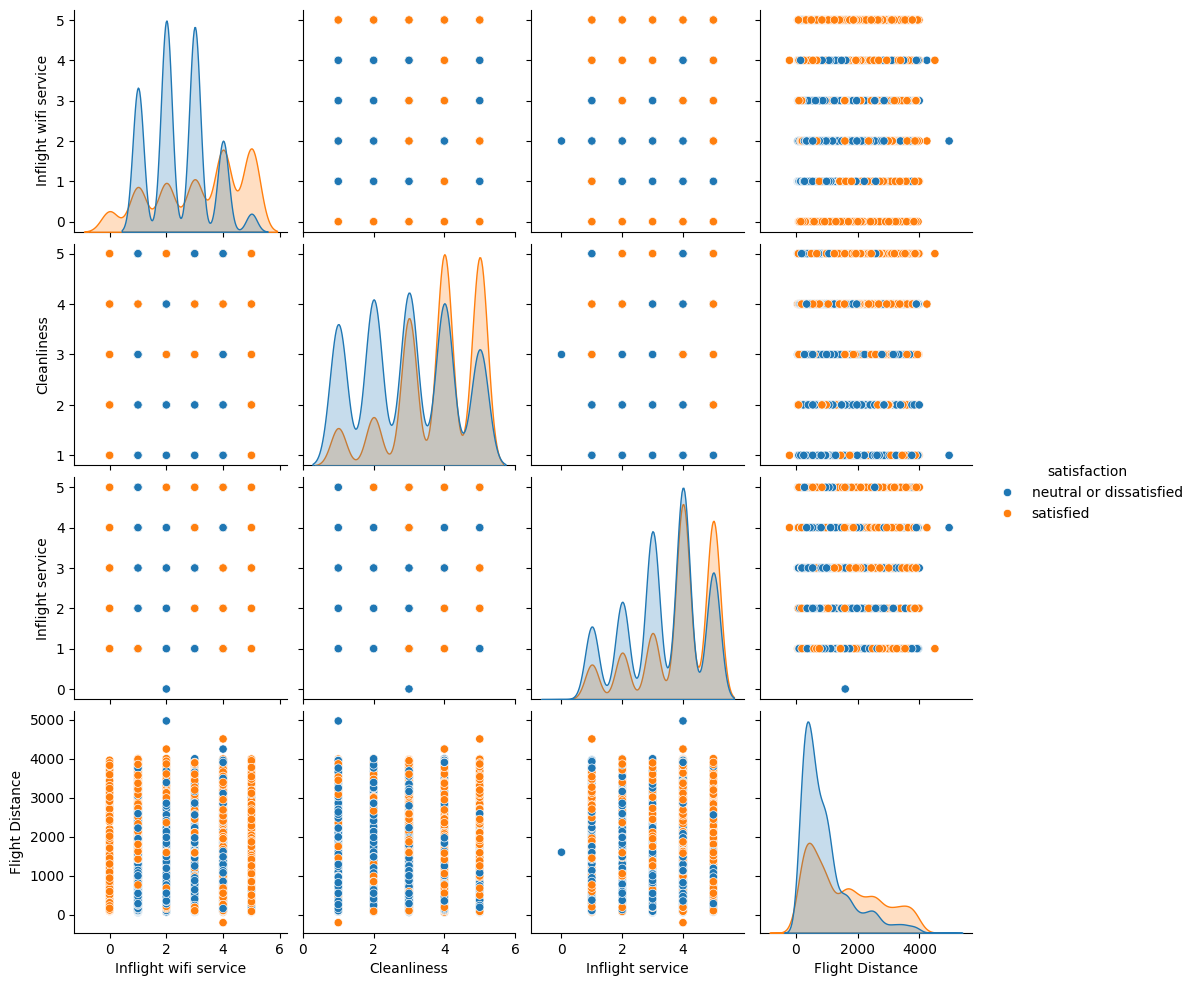

In [ ]:
sns.pairplot(to_plot, hue='satisfaction')
plt.show()

 Since this data is four dimensional, we can reduce it to two which allows to visualize the data with low reduction in explained variance

In [ ]:

pca = PCA(n_components=2)

In [ ]:
pca.fit(X_train)


In [ ]:
train_data_pca = pca.transform(X_train)
train_data_pca = pd.DataFrame(train_data_pca, columns=['PC1', 'PC2'])
train_data_pca['satisfaction'] = y_train

In [ ]:
sns.scatterplot(x='PC1', y='PC2', hue='satisfaction', data=train_data_pca)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=300, n_init=10, random_state=42)

In [ ]:
kmeans.fit(X_train)

scores

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# 4. הרצת K-Means עם 2 אשכולות
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_
k_predict = kmeans.predict(X_train)

ari_score = adjusted_rand_score(y_train.apply(lambda x :not x), cluster_labels)
print(f'Adjusted Rand Index (ARI): {ari_score}')
f1 = f1_score(y_train.apply(lambda x :not x), k_predict)
print(f'F1 Score: {f1}')

In [ ]:
train_data_pca['satisfaction'] = k_predict

#### present the points with the cluster centers

In [ ]:
sns.scatterplot(x='PC1', y='PC2', hue='satisfaction', data=train_data_pca, palette='Accent')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], marker='+', s=100 ,color='red')
plt.show()

#### Now, what can we do if we dont know the number of clusters ?
#### what are the main two clusters properies we want?
Homogeneity, seperation

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from tqdm import tqdm
iner_list = []
dbi_list = []
sil_list = []

for n_clusters in tqdm(range(2, 10, 1)):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    assignment = kmeans.predict(X_train)

    iner = kmeans.inertia_
    sil = silhouette_score(X_train, assignment)
    dbi = davies_bouldin_score(X_train, assignment)

    dbi_list.append(dbi)
    sil_list.append(sil)
    iner_list.append(iner)

plot measure

In [ ]:
plt.plot(range(2, 10, 1), iner_list, marker='o')
plt.title("Inertia")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(range(2, 10, 1), sil_list, marker='o')
plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(range(2, 10, 1), dbi_list, marker='o')
plt.title("Davies-Bouldin")
plt.xlabel("Number of clusters")
plt.show()


Inertia is a measure of homogenity - Sum of squared distances of samples to their closest cluster center.

Davies bouldin score and Silhouette measure mixed homogenity and separation.

Better clustring represents by lower inertia and Davies-Bouldin measures with higher Silhouette score


In [ ]:
from sklearn.cluster import KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_train)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)
cluster_labels = kmeans.labels_
train_data_pca['satisfaction'] = kmeans.predict(X_train)

# ari_score = adjusted_rand_score(y_train.apply(lambda x :not x), cluster_labels)
# print(f'Adjusted Rand Index (ARI): {ari_score}')
# f1 = f1_score(y_train.apply(lambda x :not x), k_predict)
# print(f'F1 Score: {f1}')

sns.scatterplot(x='PC1', y='PC2', hue='satisfaction', data=train_data_pca, palette='Accent')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], marker='+', s=100 ,color='red')
plt.show()